# Homophily using Networks

Demography, originally focused on vital statistics, now encompasses the study of shared individual and geographic characteristics to infer potential social ties across populations. These demographic and geographic factors—like age, education, or neighborhood—help explain how people form social connections, especially in the absence of direct social data. While globalism and online platforms have broadened the scope of interaction, shared backgrounds still strongly influence network formation through the principle of homophily. 

In network science, the tendency for vertices to form edges with other vertices that share important traits such as demographic or geographic factors is termed **homophily**. It plays a key role in link prediction and clustering within social networks. 

We will see 2 example here: Music spread and Epidemic spread

In [1]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [101]:
data_directory = "/home/sako/Data science lessons/Graph Theory/Modern-Graph-Theory-Algorithms-with-Python-main/data/"

# 1.  Francophone Africa music spread

## Import and Visualize the data

In this exercise we will analyze the spread of music trend spread in the African phrancophone countries. 


In [123]:
#create Francophone country network
G = nx.Graph()

# Add 23 countries
G.add_nodes_from([1, 23]) #create node IDs 1 to 23. These ids are used to create the edges  

# create edges connecting them of neighbouring countries
G.add_edges_from([
(23,13),(13,11),(12,13),(13,18),(13,1),(12,3),(12,18),
(3,22),(3,18),(3,21),(3,20),(18,1),(18,14),(18,17),(18,21),
(21,17),(21,14),(17,14),(14,1),(14,6),(14,5),(6,5),
    (1,8), #Chad - Niger Bridge -> Try removing this and 
(8,16),(8,7),(16,7),(16,2),(16,4),(16,19),(19,4),(4,2),
(7,10),(2,10),(10,15),(10,9)])

In [124]:
# Add country names
G.nodes[1]['country'] = 'Niger'
G.nodes[2]['country'] = 'Republic_of_Congo'
G.nodes[3]['country'] = 'Senegal'
G.nodes[4]['country'] = 'Gabon'
G.nodes[5]['country'] = 'Benin'
G.nodes[6]['country'] = 'Togo'
G.nodes[7]['country'] = 'Central_African_Republic'
G.nodes[8]['country'] = 'Chad'
G.nodes[9]['country'] = 'Rwanda'
G.nodes[10]['country'] = 'Democratic_Republic_of_Congo'
G.nodes[11]['country'] = 'Morocco'
G.nodes[12]['country'] = 'Mauritania'
G.nodes[13]['country'] = 'Algeria'
G.nodes[14]['country'] = 'Burkina_Faso'
G.nodes[15]['country'] = 'Burundi'
G.nodes[16]['country'] = 'Cameroon'
G.nodes[17]['country'] = 'Cote_dIvoire'
G.nodes[18]['country'] = 'Mali'
G.nodes[19]['country'] = 'Equatorial_Guinea'
G.nodes[20]['country'] = 'The_Gambia'
G.nodes[21]['country'] = 'Guinea'
G.nodes[22]['country'] = 'Guinea_Bissau'
G.nodes[23]['country'] = 'Tunisia'

### There is a bridge
One interesting thing that you will notice is that Niger and Chad form a bridge. This brigde connects different parts of the network allowing the spread from the south east to north west countries, and effect on the control.  

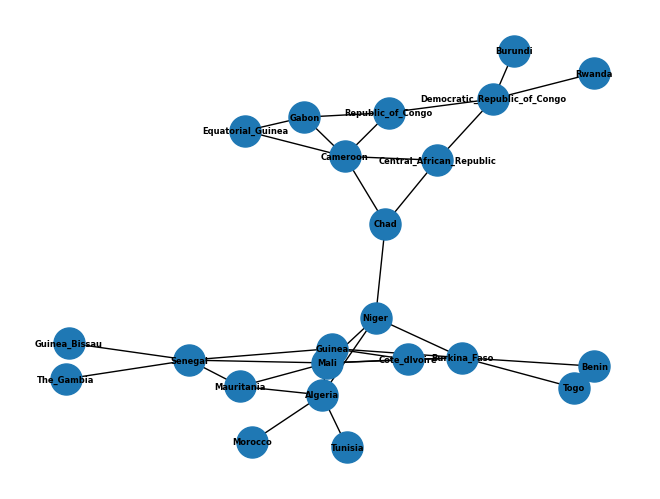

In [125]:
# plot
labels = nx.get_node_attributes(G, 'country')
nx.draw(G, 
        node_size=500,
        font_size=6,
        labels=labels, 
        font_weight='bold')

In [126]:
# Let's tabulate the results
df = {"node_id":[],
      "country":[],
      "degrees":[]}

for i in G.nodes:
    df['node_id'].append(i)
    df['country'].append(G.nodes[i]['country'])
    df['degrees'].append(G.degree[i])

df = pd.DataFrame(df)
df.sort_values("degrees")
    
    

node_id                       country  degrees
22        9                        Rwanda        1
1        23                       Tunisia        1
3        11                       Morocco        1
7        22                 Guinea_Bissau        1
9        20                    The_Gambia        1
21       15                       Burundi        1
19       19             Equatorial_Guinea        2
13        5                         Benin        2
12        6                          Togo        2
18        4                         Gabon        3
17        2             Republic_of_Congo        3
16        7      Central_African_Republic        3
14        8                          Chad        3
11       17                  Cote_dIvoire        3
4        12                    Mauritania        3
8        21                        Guinea        4
20       10  Democratic_Republic_of_Congo        4
0         1                         Niger        4
15       16                      Cameroon        5
6         3                       Senegal        5
2        13                       Algeria        5
10       14                  Burkina_Faso        6
5        18                          Mali        7

## Modelling the spread of music using differential equations


To model such spreading processes (like ideas, behaviors, or diseases), we use differential equations. They can be multi-order derivatives or multidimentional(Partial DEs are used), or include a randomness component. For doing such analysis, one can run these equation mutiple times and varying starting points to get multiple outcomes. Here we will use 1st order derivatives for particularly the SIR model (1927 used for pandemics):
* Susceptible: individuals not yet infected
* Infected: currently infected individuals
* Resistant/Recovered: no longer infectious or immune

The model uses:
* $β$ (beta): infection/spread probability
* $γ$ (gamma): recovery probability

The basic reproductive number $R_{0}$ = $\frac{β}{γ}$. If $R_{0}$ > 1, the spread will likely grow. Ex. Covid19 in Africa ranged at $R_{0}=$2.0 ~ 9.7 for most countries

---

Note: There are other models like the SIRS (includes reinfection after recovery) & SIS (infection after infection - no recovery)   

---

In network-based SIR models, infection spreads only to neighboring nodes. Bridges, like Chad and Niger, are critical in enabling spread between communities. They are often strategic targets for interventions, like stopping epidemics or boosting marketing.



**Hubs** (e.g., Burkina Faso, Mali) are densely connected and facilitate wide spread, especially if connected to other hubs or bridges. Tools like betweenness centrality help identify bridge nodes, as they lie on many shortest paths.

Finally, using an example of a music trend spreading across Francophone Africa with $β$ = 0.25, $γ$ = 0.10, and initial 5% adoption, the model yields R₀ ≈ 2.5, predicting strong early spread—especially through bridges and hubs.

In [127]:
import ndlib.models.epidemics as ep # Import model of SIR
import ndlib.models.ModelConfig as mc # Import model configuration


### $\beta$ = 0.25 and $\gamma$ = 0.1 => $R_{0}$ = 2.5 --> Infectious

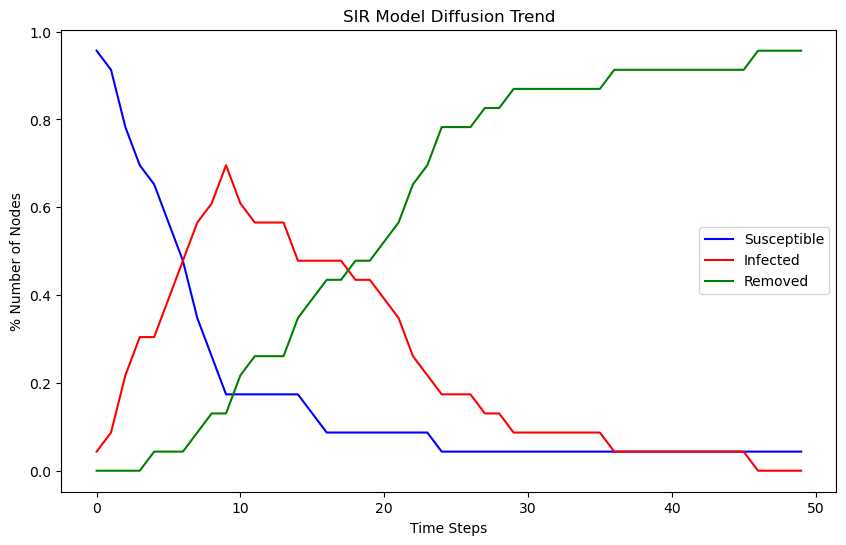

In [130]:

# Model Selection
model = ep.SIRModel(G)

# Set model config
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.1)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
total_nodes = df.shape[0]

# Extract trends
susceptible = np.array([point['trends']['node_count'][0] for point in trends][0])/total_nodes
infected = np.array([point['trends']['node_count'][1] for point in trends][0])/total_nodes
removed = np.array([point['trends']['node_count'][2] for point in trends][0])/total_nodes
time = list(range(len(susceptible)))


# Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time, susceptible, label='Susceptible', color='blue')
plt.plot(time, infected, label='Infected', color='red')
plt.plot(time, removed, label='Removed', color='green')
plt.xlabel('Time Steps')
plt.ylabel('% Number of Nodes')
plt.title('SIR Model Diffusion Trend')
plt.legend()



### $\beta$ = 0.25 and $\gamma$ = 0.3 => $R_{0}$ = 0.833 --> Not-Infectious

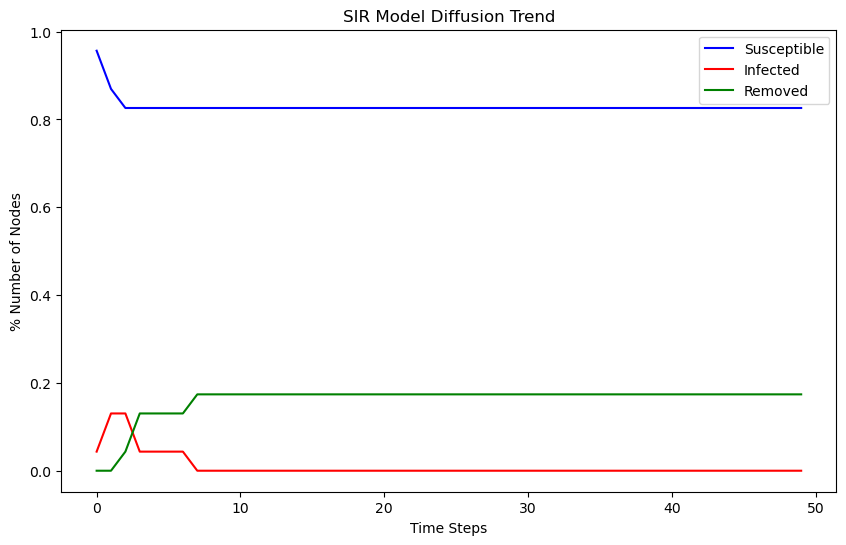

In [90]:

# Model Selection
model = ep.SIRModel(G)

# Set model config
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.3)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
total_nodes = df.shape[0]

# Extract trends
susceptible = np.array([point['trends']['node_count'][0] for point in trends][0])/total_nodes
infected = np.array([point['trends']['node_count'][1] for point in trends][0])/total_nodes
removed = np.array([point['trends']['node_count'][2] for point in trends][0])/total_nodes
time = list(range(len(susceptible)))


# Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time, susceptible, label='Susceptible', color='blue')
plt.plot(time, infected, label='Infected', color='red')
plt.plot(time, removed, label='Removed', color='green')
plt.xlabel('Time Steps')
plt.ylabel('% Number of Nodes')
plt.title('SIR Model Diffusion Trend')
plt.legend()


**Remove the Brigde**: Go back to the nodes and remove the connection where Niger and Chad see how it effects infections rates

# 2. AIMS Cameroon student network epidemic model

## Build the graph
This will study the outbreak of a virus in students at a university at AIMS Cameroon

In [103]:
#reading the dataset
fichier = pd.read_csv(data_directory+"AIMS_data.csv")
data = pd.DataFrame(fichier)

In [105]:
data.sample(2)

Name   Country   Age                Field           Background Friend 1  \
0    Alice     Kenya  24.0         Data Science  Applied Mathematics   Dorcas   
37  Peniel  Cameroon  23.0  Fundamental Science              Physics    Aneva   

    Friend 2 Friend 3    Friend 4  Friend 5  
0      Caleb   Brenda  Christabel    Victor  
37  Delchere  Rostand      Phanie  Wilfried

In [106]:
#intializing the social network
aimsNetwork = nx.Graph()

#populating the network with nodes and edges
for i in range(len(data["Name"])):
    aimsNetwork.add_node(
                data["Name"][i], 
                Age=data["Age"][i],
                country=data["Country"][i],
                Field=data["Field"][i],
                background=data["Background"][i])

#define length
N = len(aimsNetwork.nodes())

In [119]:
# one can build the adjacency matrix
AIMS_by_Country_or_Field = nx.Graph()

#define objects
AIMS = aimsNetwork
students = list(AIMS.nodes())

#create edges based on similarity of Fields and countries
for i in range(N-1):
    for j in range(i+1,N):
        sti = students[i]
        stj = students[j]
        if AIMS.nodes[sti]['Field'] == AIMS.nodes[stj]['Field'] or AIMS.nodes[sti]['country'] == AIMS.nodes[stj]['country']:
            AIMS_by_Country_or_Field.add_edge(sti,stj)



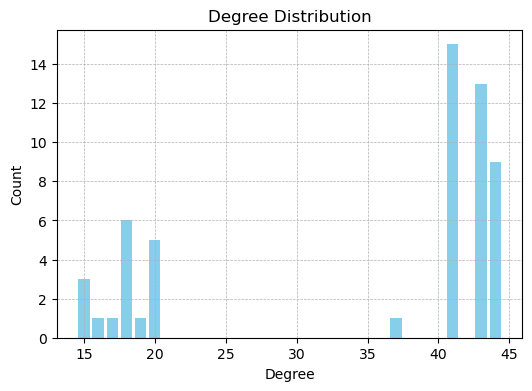

In [121]:
# Plot the degree distribution
degree_sequence = [d for n, d in AIMS_by_Country_or_Field.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

plt.figure(figsize=(6, 4))
plt.bar(deg, cnt, width=0.80, color="skyblue")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

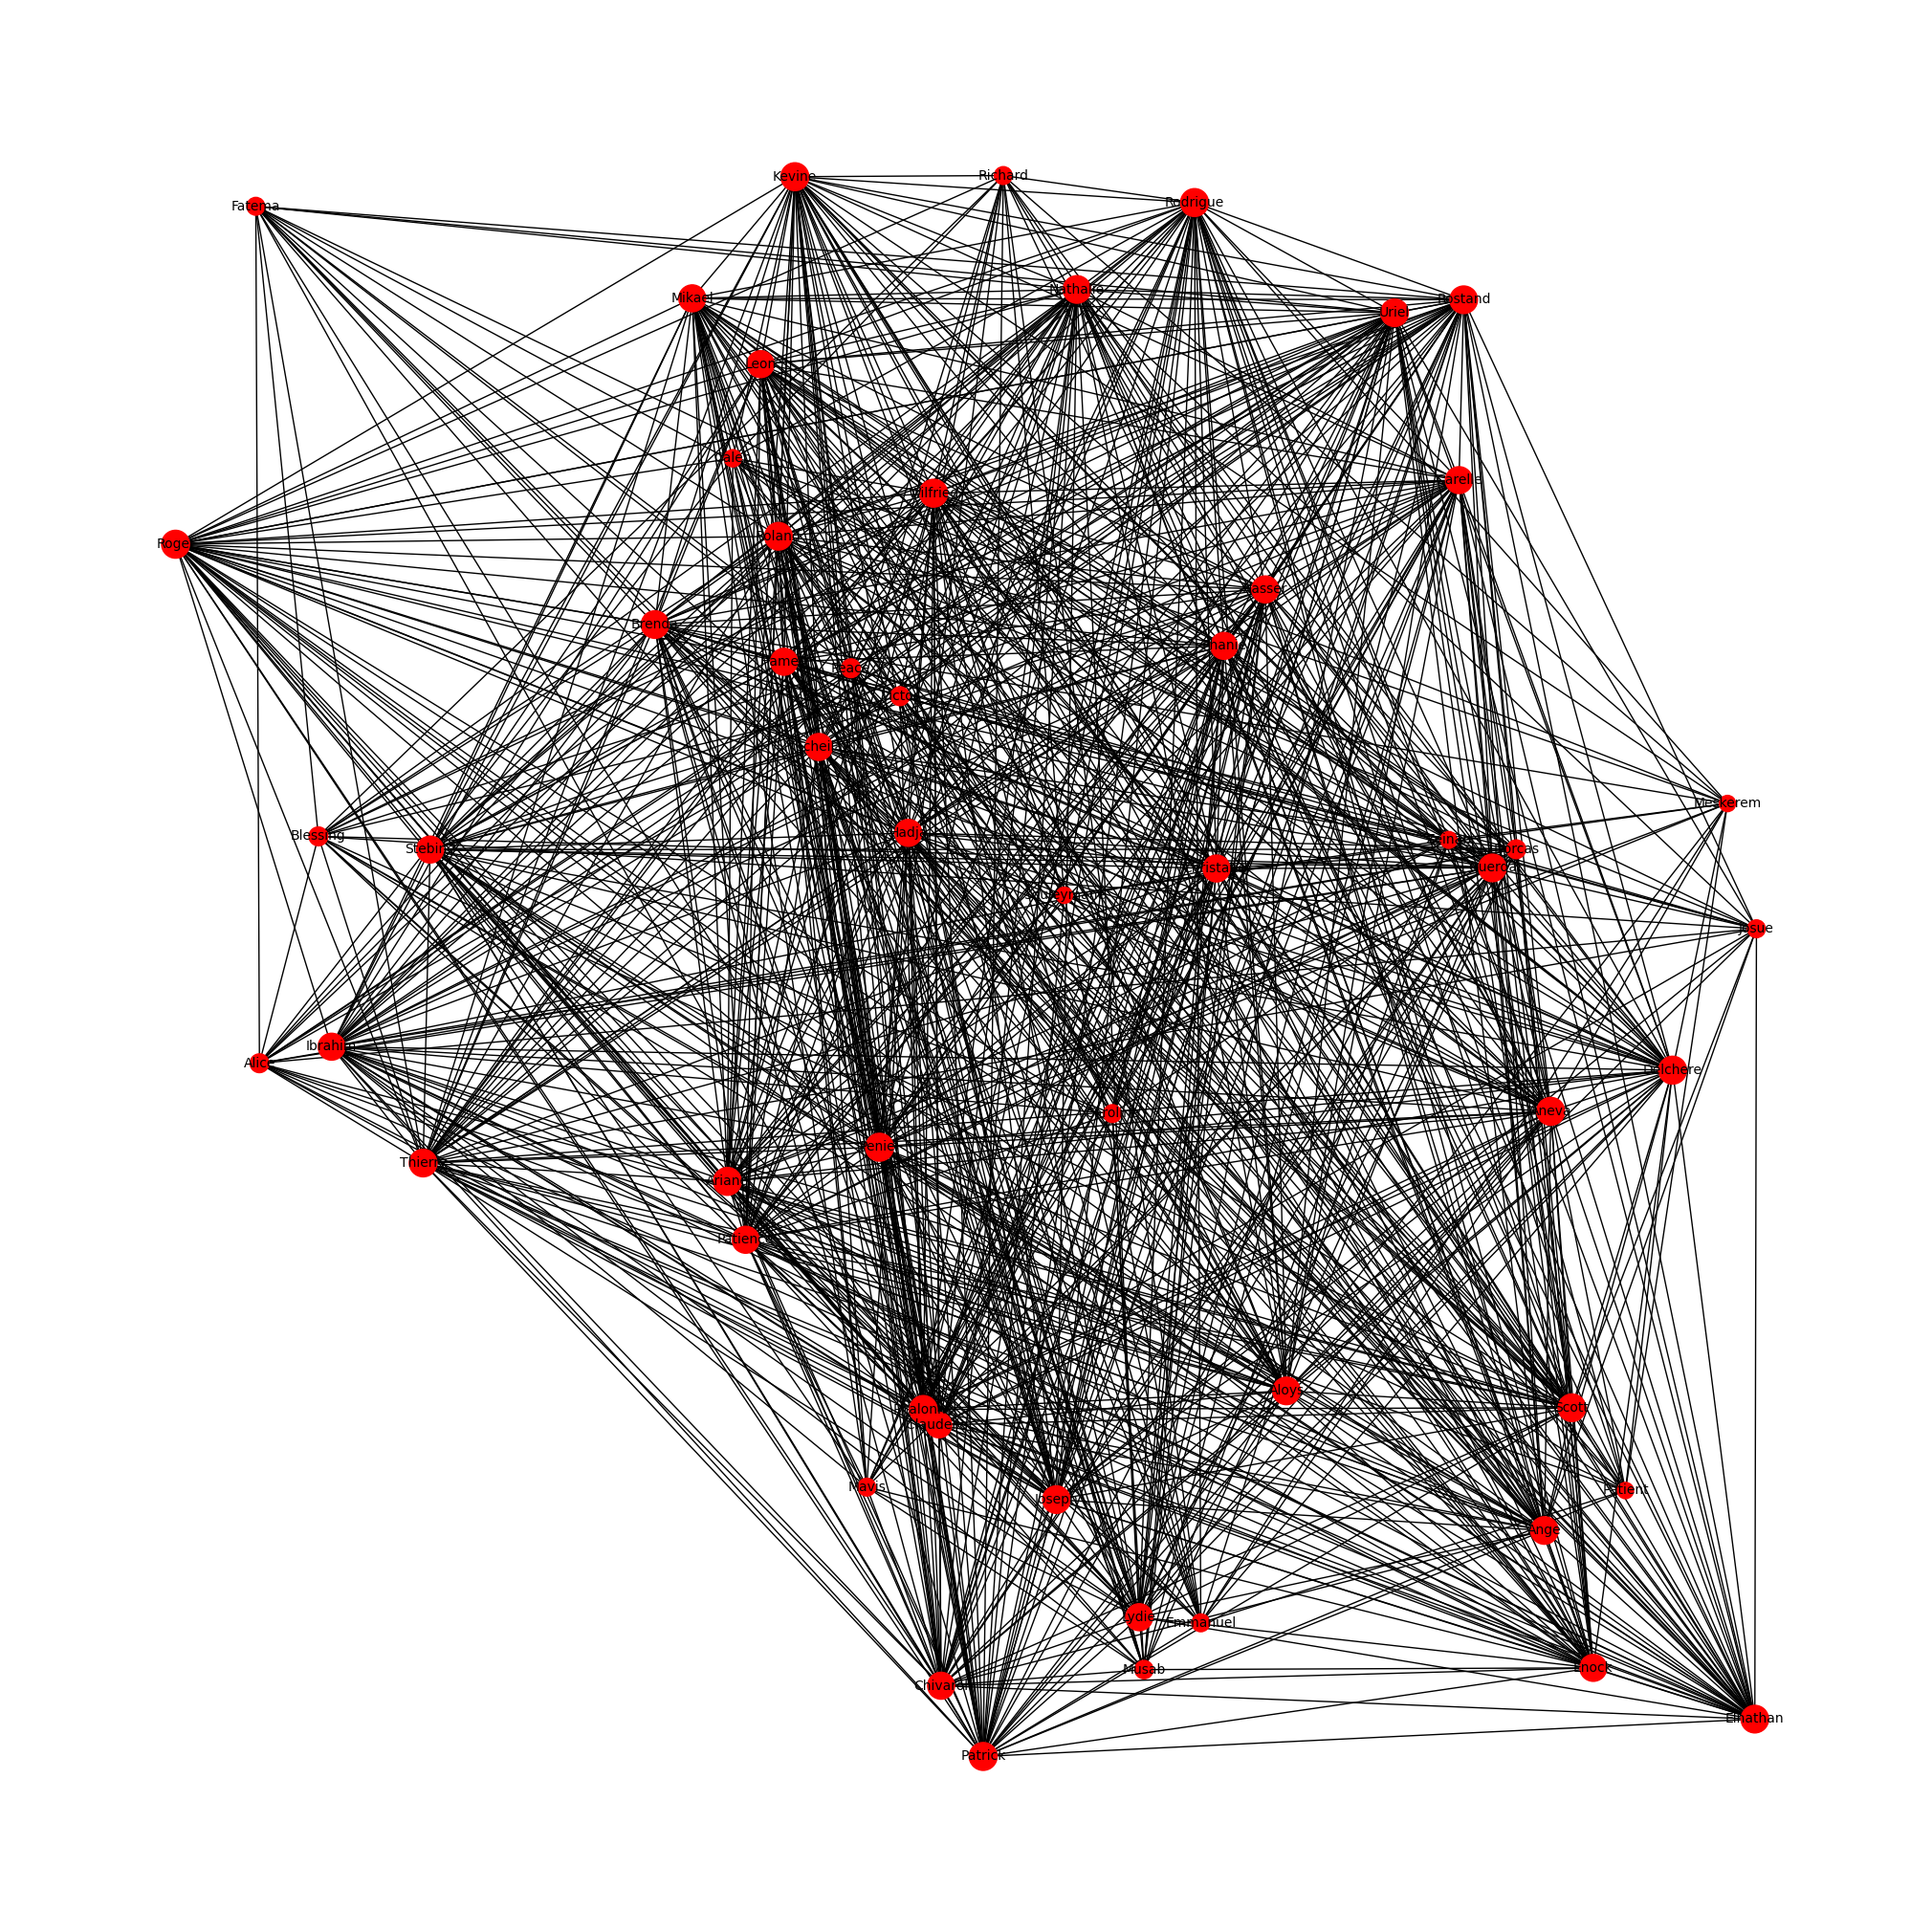

In [166]:
#create plot
Degree=AIMS_by_Country_or_Field.degree()
var = [10*k[1] for k in list(Degree)]
plt.figure(figsize=(20,20))
nx.draw_random(AIMS_by_Country_or_Field, font_size=10,
node_size = var, with_labels=True, node_color="red")
plt.show()

## SIR model for the student network $R_{0}$ = 2.5

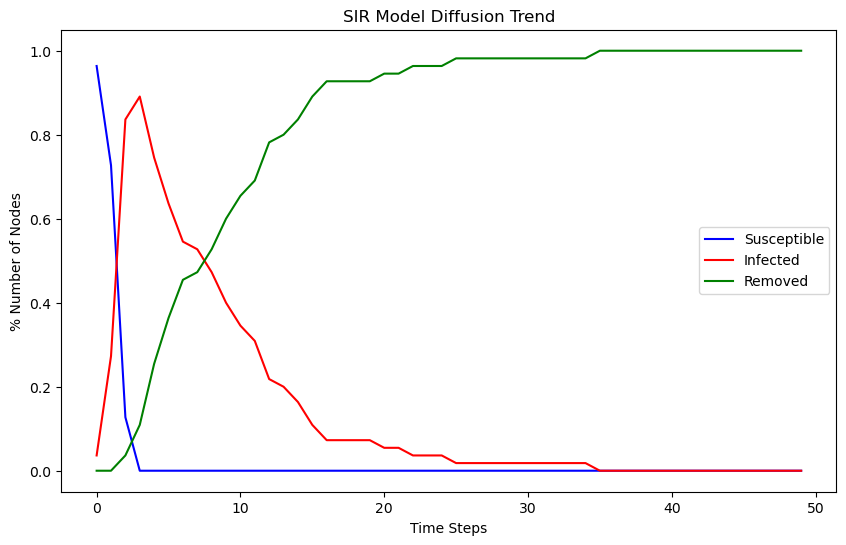

In [170]:
# Model Selection
model = ep.SIRModel(AIMS_by_Country_or_Field)

# Set model config
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.1)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
total_nodes = N

# Extract trends
susceptible = np.array([point['trends']['node_count'][0] for point in trends][0])/total_nodes
infected = np.array([point['trends']['node_count'][1] for point in trends][0])/total_nodes
removed = np.array([point['trends']['node_count'][2] for point in trends][0])/total_nodes
time = list(range(len(susceptible)))


# Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time, susceptible, label='Susceptible', color='blue')
plt.plot(time, infected, label='Infected', color='red')
plt.plot(time, removed, label='Removed', color='green')
plt.xlabel('Time Steps')
plt.ylabel('% Number of Nodes')
plt.title('SIR Model Diffusion Trend')
plt.legend()

## SIR model for the student network $R_{0}$ = 0.83

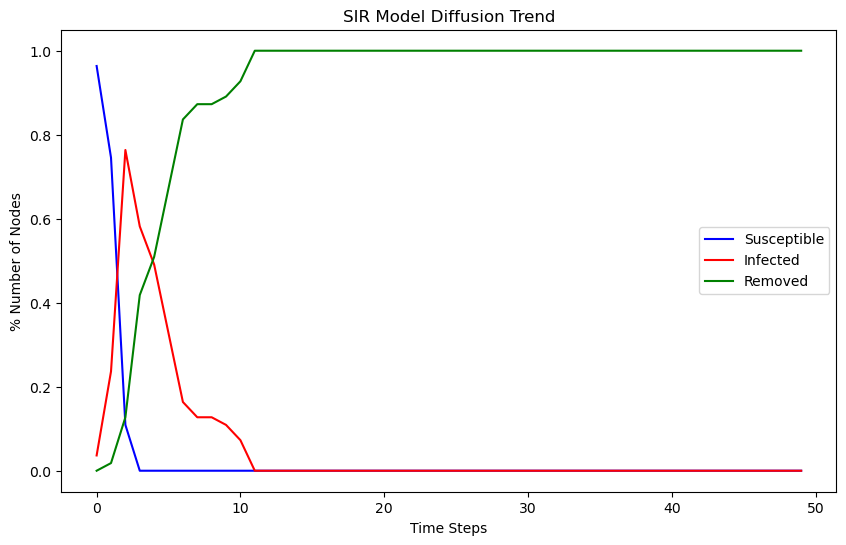

In [169]:
# Model Selection
model = ep.SIRModel(AIMS_by_Country_or_Field)

# Set model config
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.3)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
total_nodes = N

# Extract trends
susceptible = np.array([point['trends']['node_count'][0] for point in trends][0])/total_nodes
infected = np.array([point['trends']['node_count'][1] for point in trends][0])/total_nodes
removed = np.array([point['trends']['node_count'][2] for point in trends][0])/total_nodes
time = list(range(len(susceptible)))


# Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time, susceptible, label='Susceptible', color='blue')
plt.plot(time, infected, label='Infected', color='red')
plt.plot(time, removed, label='Removed', color='green')
plt.xlabel('Time Steps')
plt.ylabel('% Number of Nodes')
plt.title('SIR Model Diffusion Trend')
plt.legend()

## Conclusion

You will see between 2 of the experiments that even when we increased $\beta$ to decrease $R_{0}$, the spread happened very quickly and extremely. 
One thing to remember is the concept of the **Diameter of a network**

The diameter of a
network, the longest-shortest path, represents the maximum shortest travel route for information or
disease to spread between two vertices. A small network diameter (or a small average shortest path
length) suggests efficiency in spreading processes, such as information, trends, or disease. Thus, we’d
expect our AIMS Cameroon student network to be more vulnerable to spreading processes than ourFrancophone Africa network. Technically, the diameter provides bounds for differential equations,
such as our spreading process, that are defined on the network.
